In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('Extracted_Features_2.csv')
data = data.dropna()

In [7]:
data = data[~data['voto'].between(23, 39)]
data

,ID,PAINTING,PUNTI_NEL_QUADRO,FIXATIONS,mean_diam_pupilla,min_diam_pupilla,max_diam_pupilla,std_diam_pupilla,diff_max_quadro_blank,max_similar_fixations,max_durata_similar_fixations,n_aree_interesse,voto
3,1,6,646,14,37.953279,13.638764,78.819977,15.688681,15.672775,9,24250,2,18
5,1,9,677,19,39.089616,13.763141,72.763443,13.207146,9.616241,5,13000,4,44
8,1,13,669,10,39.155849,13.641875,51.009647,13.758253,-12.137554,7,24750,2,20
9,1,14,565,5,40.888457,10.376008,1098.713379,44.817042,1035.566177,4,10500,2,14
10,1,15,799,9,23.516493,15.360437,157.176102,20.550892,94.028900,8,21500,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,433,20,1370,51,39.604417,10.116007,108.807968,17.588478,-6.252411,21,60500,3,3
3252,433,21,1180,30,43.477272,12.056443,94.056313,19.143375,-21.004066,20,56000,3,4
3254,433,23,1406,49,34.457771,10.814601,72.476982,10.125300,-42.583397,37,119000,3,2
3255,433,45,1346,37,38.354141,10.227341,84.657867,16.408542,-30.402512,20,63500,2,47


In [8]:
data['Binary'] = (data['voto']>22).astype(int)
data

,ID,PAINTING,PUNTI_NEL_QUADRO,FIXATIONS,mean_diam_pupilla,min_diam_pupilla,max_diam_pupilla,std_diam_pupilla,diff_max_quadro_blank,max_similar_fixations,max_durata_similar_fixations,n_aree_interesse,voto,Binary
3,1,6,646,14,37.953279,13.638764,78.819977,15.688681,15.672775,9,24250,2,18,0
5,1,9,677,19,39.089616,13.763141,72.763443,13.207146,9.616241,5,13000,4,44,1
8,1,13,669,10,39.155849,13.641875,51.009647,13.758253,-12.137554,7,24750,2,20,0
9,1,14,565,5,40.888457,10.376008,1098.713379,44.817042,1035.566177,4,10500,2,14,0
10,1,15,799,9,23.516493,15.360437,157.176102,20.550892,94.028900,8,21500,2,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,433,20,1370,51,39.604417,10.116007,108.807968,17.588478,-6.252411,21,60500,3,3,0
3252,433,21,1180,30,43.477272,12.056443,94.056313,19.143375,-21.004066,20,56000,3,4,0
3254,433,23,1406,49,34.457771,10.814601,72.476982,10.125300,-42.583397,37,119000,3,2,0
3255,433,45,1346,37,38.354141,10.227341,84.657867,16.408542,-30.402512,20,63500,2,47,1


In [9]:
from scipy.stats import kruskal

not_int = ['ID', 'PAINTING', 'voto', 'Binary']

# Lista per memorizzare i risultati del test di Kruskal-Wallis
results = []

# Itera su ogni colonna del DataFrame
for column in data.columns:
    if column not in not_int:
        group1 = data[data['Binary'] == 0][column].dropna()
        group2 = data[data['Binary'] == 1][column].dropna()
        
        # Esegui il test di Kruskal-Wallis
        stat, p_value = kruskal(group1, group2)
        
        # Aggiungi i risultati alla lista
        results.append({'Column': column, 'Kruskal-Wallis Statistic': stat, 'p-value': p_value})

# Crea un DataFrame dai risultati
results_data = pd.DataFrame(results)

results_data

,Column,Kruskal-Wallis Statistic,p-value
0,PUNTI_NEL_QUADRO,14.031471,1.797765e-04
1,FIXATIONS,23.695111,1.128689e-06
2,mean_diam_pupilla,5.830590,1.574984e-02
3,min_diam_pupilla,0.906675,3.409981e-01
4,max_diam_pupilla,0.736301,3.908484e-01
5,std_diam_pupilla,0.198209,6.561704e-01
6,diff_max_quadro_blank,3.920008,4.771464e-02
7,max_similar_fixations,27.683212,1.428975e-07
8,max_durata_similar_fixations,39.548815,3.199606e-10
9,n_aree_interesse,1.119777,2.899664e-01


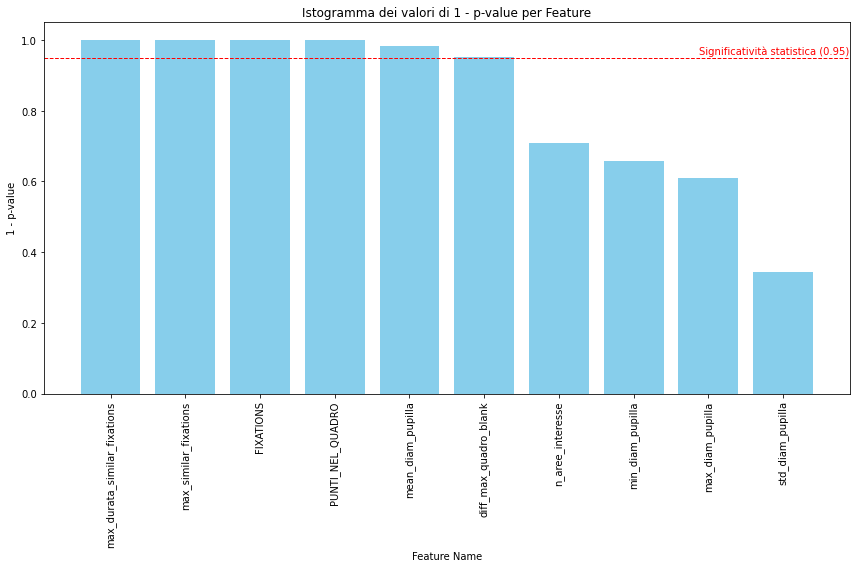

In [10]:
import matplotlib.pyplot as plt

# Supponiamo che results_data sia il tuo DataFrame con le colonne 'feature_name' e 'p-value'
# results_data = pd.read_csv('path_to_your_csv.csv')  # Se stai caricando da un file CSV

# Calcola 1 - p-value
results_data['1 - p-value'] = 1 - results_data['p-value']

# Ordina il DataFrame in base a '1 - p-value' in ordine decrescente
results_data_sorted = results_data.sort_values(by='1 - p-value', ascending=False)

# Crea l'istogramma
plt.figure(figsize=(12, 8))
plt.bar(results_data_sorted['Column'], results_data_sorted['1 - p-value'], color='skyblue')
# Aggiungi la riga tratteggiata per la significatività statistica
plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1)
xlim = plt.gca().get_xlim()
plt.text(xlim[1], 0.96, 'Significatività statistica (0.95)', color='r', fontsize=10, ha='right')


# Imposta etichette e titolo
plt.xlabel('Feature Name')
plt.ylabel('1 - p-value')
plt.title('Istogramma dei valori di 1 - p-value per Feature')
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.tight_layout()  # Migliora l'adattamento del grafico all'area di disegno

# Visualizza il grafico
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


# Inizializza una lista per memorizzare i risultati
results = []

# Features e target
features = ['PUNTI_NEL_QUADRO', 'FIXATIONS', 'mean_diam_pupilla', 'min_diam_pupilla', 'max_diam_pupilla', 'std_diam_pupilla', 'diff_max_quadro_blank', 'max_similar_fixations', 'max_durata_similar_fixations', 'n_aree_interesse']
target = 'Binary'

# Ottieni tutti i painting unici
paintings = data['PAINTING'].unique()

for painting in paintings:
    # Filtra il dataframe per il painting corrente
    painting_data = data[data['PAINTING'] == painting]

    # Separare le feature e il target
    X = painting_data[features]
    y = painting_data[target]

    # Bilancia il dataset
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)

    # Suddividi il dataset bilanciato in train e test set
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

    # Crea e addestra il modello Random Forest
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predici sul test set
    y_pred = model.predict(X_test)

    # Calcola le metriche
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Memorizza i risultati
    results.append({
        'PAINTING': painting,
        'Supporto': len(X_res),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1
    })

# Crea un dataframe dai risultati
results_data_training = pd.DataFrame(results)

results_data_training

# Salva i risultati in un file CSV
#results_data.to_csv('path/to/save/results.csv', index=False)


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,PAINTING,Supporto,accuracy,precision,recall,f1-score
0,6,78,0.687500,0.666667,0.571429,0.615385
1,9,58,0.416667,0.444444,0.666667,0.533333
2,13,28,0.666667,0.500000,0.500000,0.500000
3,14,34,0.714286,0.800000,0.800000,0.800000
4,15,96,0.550000,0.500000,0.444444,0.470588
5,47,34,0.285714,0.500000,0.200000,0.285714
6,4,74,0.666667,0.500000,0.400000,0.444444
7,10,52,0.454545,0.428571,0.600000,0.500000
8,20,84,0.470588,0.454545,0.625000,0.526316
9,23,46,0.400000,0.500000,0.166667,0.250000


In [15]:
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.tree import _tree

# Features e target
features = ['PUNTI_NEL_QUADRO', 'FIXATIONS', 'mean_diam_pupilla', 'min_diam_pupilla', 'max_diam_pupilla', 'std_diam_pupilla', 'diff_max_quadro_blank', 'max_similar_fixations', 'max_durata_similar_fixations', 'n_aree_interesse']
target = 'Binary'

X = data[features]
y = data[target]

# Crea e addestra il modello Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

def extract_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    rules = []
    
    def recurse(node, depth):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            rules.append(f"{name} <= {threshold:.2f}")
            recurse(tree_.children_left[node], depth + 1)
            rules.append(f"{name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
    
    recurse(0, 1)
    return rules

# Estrai e conta le regole dai singoli alberi nella foresta
rule_counter = Counter()
for i, tree in enumerate(model.estimators_):
    rules = extract_rules(tree, features)
    rule_counter.update(rules)

# Seleziona le regole più ricorrenti
most_common_rules = rule_counter.most_common(10)

# Stampa le regole più importanti, determinanti e ricorrenti
print("Most common rules:")
for rule, count in most_common_rules:
    if "return" not in rule:
        print(f"Rule: {rule}, Count: {count}")


Most common rules:
Rule: n_aree_interesse <= 2.50, Count: 393
Rule: n_aree_interesse > 2.50, Count: 393
Rule: n_aree_interesse <= 3.50, Count: 238
Rule: n_aree_interesse > 3.50, Count: 238
Rule: n_aree_interesse <= 4.50, Count: 143
Rule: n_aree_interesse > 4.50, Count: 143
Rule: max_similar_fixations <= 11.50, Count: 106
Rule: max_similar_fixations > 11.50, Count: 106
Rule: max_similar_fixations <= 9.50, Count: 102
Rule: max_similar_fixations > 9.50, Count: 102
